In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255,)
test_image_generator = ImageDataGenerator(rescale=1./255,)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,batch_size=batch_size,target_size=(IMG_HEIGHT,IMG_WIDTH),class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,batch_size=batch_size,target_size=(IMG_HEIGHT,IMG_WIDTH),class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(directory=PATH,target_size=(IMG_HEIGHT,IMG_WIDTH),shuffle=False,batch_size=batch_size,class_mode='binary',classes=['test'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


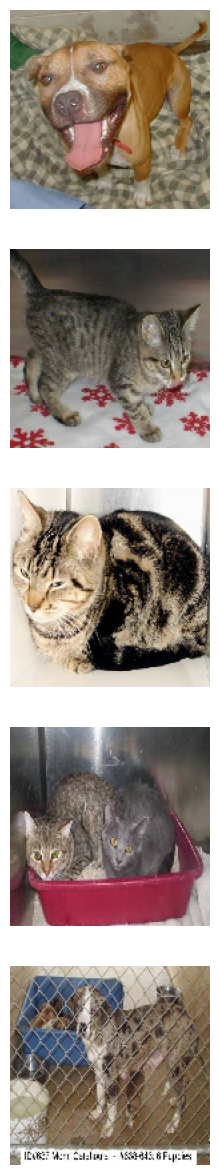

In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [5]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


Found 2000 images belonging to 2 classes.


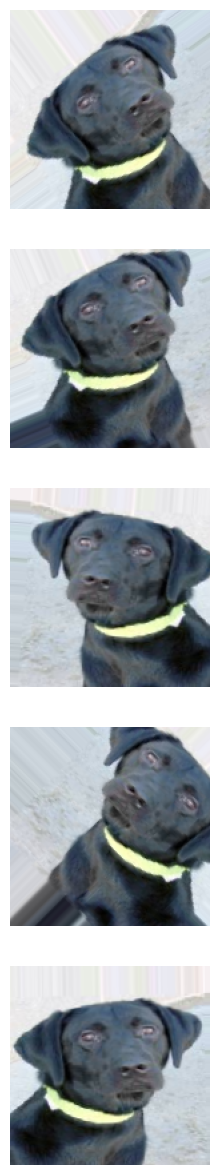

In [6]:
# 6
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [7]:
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Dense(2))


model.compile(optimizer='adam', metrics=['accuracy'], loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True))


model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)     

In [9]:
history = model.fit(train_data_gen, steps_per_epoch=total_train//batch_size, epochs=epochs,
                    validation_data=val_data_gen, validation_steps=total_val//batch_size, verbose=1)


Epoch 1/15


15/15 [==============================] - 50s 3s/step - loss: 1.1028 - accuracy: 0.5064 - val_loss: 0.6925 - val_accuracy: 0.5379
Epoch 2/15
15/15 [==============================] - 20s 1s/step - loss: 0.6927 - accuracy: 0.5299 - val_loss: 0.6801 - val_accuracy: 0.6094
Epoch 3/15
15/15 [==============================] - 22s 1s/step - loss: 0.6910 - accuracy: 0.5144 - val_loss: 0.6707 - val_accuracy: 0.5960
Epoch 4/15
15/15 [==============================] - 21s 1s/step - loss: 0.6779 - accuracy: 0.5775 - val_loss: 0.6315 - val_accuracy: 0.6194
Epoch 5/15
15/15 [==============================] - 22s 1s/step - loss: 0.6639 - accuracy: 0.5994 - val_loss: 0.6332 - val_accuracy: 0.5915
Epoch 6/15
15/15 [==============================] - 21s 1s/step - loss: 0.6408 - accuracy: 0.6357 - val_loss: 0.6037 - val_accuracy: 0.6708
Epoch 7/15
15/15 [==============================] - 25s 2s/step - loss: 0.6367 - accuracy: 0.6309 - val_loss: 0.5991 - val_accuracy: 0.6719
Epoch 8/15
15/15 [

In [10]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
test_images, _ = next(test_data_gen)
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
probabilities

1/1 [==============================] - 0s 303ms/step


array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0], dtype=int64)

In [13]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 76.0% of the images of cats and dogs.
You passed the challenge!
